In [247]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from sklearn.model_selection import train_test_split

**Dataset Description**

In this challenge, you are given a list of users along with their demographics, web session records, and some summary statistics. You are asked to predict which country a new user's first booking destination will be. All the users in this dataset are from the USA.

There are 12 possible outcomes of the destination country: 'US', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL','DE', 'AU', 'NDF' (no destination found), and 'other'. Please note that 'NDF' is different from 'other' because 'other' means there was a booking, but is to a country not included in the list, while 'NDF' means there wasn't a booking.

In [248]:
train_users=pd.read_csv(r"D:\Rahul\Scaler\DSML Portfolio Project\train_users.csv")
sessions=pd.read_csv(r"D:\Rahul\Scaler\DSML Portfolio Project\sessions.csv")
countries=pd.read_csv(r"D:\Rahul\Scaler\DSML Portfolio Project\countries.csv")

In [249]:
print(f"Train users table has {train_users.shape[0]} rows and {train_users.shape[1]} columns")

Train users table has 213451 rows and 16 columns


In [250]:
train_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [251]:
train_users.isna().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [252]:
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [253]:
print(f"""Session table has {sessions.shape[0]} rows and {sessions.shape[1]} columns. 
It has {sessions['user_id'].nunique()} unique ids""")

Session table has 10567737 rows and 6 columns. 
It has 135483 unique ids


In [254]:
grouped_sessions=sessions.groupby(by=['user_id','device_type'])['secs_elapsed'].sum().reset_index()

In [255]:
main_df=pd.merge(train_users,grouped_sessions,how='left',left_on='id',right_on='user_id')

In [256]:
countries.head()

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06


In [257]:
# Dropping columns which are not useful in Countries dataframe
countries.drop(axis=1,labels=['lat_destination','lng_destination','language_levenshtein_distance',
                              'distance_km','destination_km2'],inplace=True)

In [258]:
main_df=pd.merge(main_df,countries,how='left',left_on='country_destination',right_on='country_destination')

In [259]:
main_df.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination', 'user_id', 'device_type',
       'secs_elapsed', 'destination_language '],
      dtype='object')

In [260]:
main_df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,user_id,device_type,secs_elapsed,destination_language
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,NaN,NaN,NaN,NaN
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,NaN,NaN,NaN,NaN
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,NaN,NaN,NaN,eng
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,NaN,NaN,NaN,NaN
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,NaN,NaN,NaN,eng


In [261]:
# Dropping Columns
main_df.drop(axis=1,labels=['user_id','first_affiliate_tracked','language'],inplace=True)

In [262]:
main_df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,affiliate_channel,affiliate_provider,signup_app,first_device_type,first_browser,country_destination,device_type,secs_elapsed,destination_language
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,direct,direct,Web,Mac Desktop,Chrome,NDF,NaN,NaN,NaN
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,seo,google,Web,Mac Desktop,Chrome,NDF,NaN,NaN,NaN
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,direct,direct,Web,Windows Desktop,IE,US,NaN,NaN,eng
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,direct,direct,Web,Mac Desktop,Firefox,other,NaN,NaN,NaN
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,direct,direct,Web,Mac Desktop,Chrome,US,NaN,NaN,eng


In [263]:
# Percentage of null values in each column
round(main_df.isna().sum()/len(main_df)*100,2)

id                         0.00
date_account_created       0.00
timestamp_first_active     0.00
date_first_booking        58.19
gender                     0.00
age                       40.63
signup_method              0.00
signup_flow                0.00
affiliate_channel          0.00
affiliate_provider         0.00
signup_app                 0.00
first_device_type          0.00
first_browser              0.00
country_destination        0.00
device_type               59.02
secs_elapsed              59.02
destination_language      62.95
dtype: float64

In [264]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236604 entries, 0 to 236603
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      236604 non-null  object 
 1   date_account_created    236604 non-null  object 
 2   timestamp_first_active  236604 non-null  int64  
 3   date_first_booking      98925 non-null   object 
 4   gender                  236604 non-null  object 
 5   age                     140472 non-null  float64
 6   signup_method           236604 non-null  object 
 7   signup_flow             236604 non-null  int64  
 8   affiliate_channel       236604 non-null  object 
 9   affiliate_provider      236604 non-null  object 
 10  signup_app              236604 non-null  object 
 11  first_device_type       236604 non-null  object 
 12  first_browser           236604 non-null  object 
 13  country_destination     236604 non-null  object 
 14  device_type         

In [265]:
# Changing respective datatypes
main_df['date_account_created']=pd.to_datetime(main_df['date_account_created'])
main_df['timestamp_first_active']=pd.to_datetime(main_df['timestamp_first_active'],format='%Y%m%d%H%M%S')
main_df['date_first_booking']=pd.to_datetime(main_df['date_first_booking'])

In [266]:
print(f"We have dataset from {main_df['date_first_booking'].min()} to {main_df['date_first_booking'].max()}")

We have dataset from 2010-01-02 00:00:00 to 2015-06-29 00:00:00


In [267]:
main_df['age'].describe()

count    140472.000000
mean         48.953428
std         152.144476
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

Here, max age is 2014 which might be possible someone entered year instead of it so we'll treat it correctly.
Similarly min age is 1 which is not possible so  we'll treat it seperately too.

In [268]:
main_df.loc[(main_df['age']>1000),'age']=2015-main_df.loc[(main_df['age']>1000),'age']

In [269]:
main_df.loc[(main_df['age']>100)|(main_df['age']<18),'age']=None

In [270]:
main_df['age'].describe()

count    137771.000000
mean         36.430279
std          11.701510
min          18.000000
25%          28.000000
50%          33.000000
75%          42.000000
max         100.000000
Name: age, dtype: float64

In [271]:
def age_brackets(df):
    if df['age']<=24:
        return "18 to 24"
    elif df['age']<=34:
        return "25 to 34"
    elif df['age']<=44:
        return "35 to 44"
    elif df['age']<=54:
        return "45 to 54"
    elif df['age']<=64:
        return "55 to 64"
    elif df['age']>64:
        return "65 or over"
    else:
        return "NA"    

In [272]:
main_df['age_bracket']=main_df.apply(age_brackets,axis=1)

In [273]:
def hours_elapsed_brackets(df):
    if (df['secs_elapsed']/3600)==0:
        return "No time spent"
    elif (df['secs_elapsed']/3600)<=20:
        return "0 to 20 hours"
    elif (df['secs_elapsed']/3600)<=50:
        return "20 to 50"
    elif (df['secs_elapsed']/3600)<=100:
        return "50 to 100"
    elif (df['secs_elapsed']/3600)<=200:
        return "100 to 200"
    elif (df['secs_elapsed']/3600)<=400:
        return "200 to 400"
    elif (df['secs_elapsed']/3600)>400:
        return "400 or over"
    else:
        return "NA"   

In [274]:
main_df['hours_elapsed_bracket']=main_df.apply(hours_elapsed_brackets,axis=1)

In [275]:
# Extracting month values from datetime and dropping timestamp column
main_df['month_first_booking']=main_df['date_first_booking'].dt.month
main_df['month_name']=main_df['date_first_booking'].dt.month_name()
main_df['date_first_active']=main_df['timestamp_first_active'].dt.date
main_df['date_first_active']=pd.to_datetime(main_df['date_first_active'])
main_df.drop(axis=1,labels=['timestamp_first_active','date_first_booking'],inplace=True)

In [276]:
main_df['device_type'].fillna("NA",inplace=True)

In [277]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236604 entries, 0 to 236603
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   id                     236604 non-null  object        
 1   date_account_created   236604 non-null  datetime64[ns]
 2   gender                 236604 non-null  object        
 3   age                    137771 non-null  float64       
 4   signup_method          236604 non-null  object        
 5   signup_flow            236604 non-null  int64         
 6   affiliate_channel      236604 non-null  object        
 7   affiliate_provider     236604 non-null  object        
 8   signup_app             236604 non-null  object        
 9   first_device_type      236604 non-null  object        
 10  first_browser          236604 non-null  object        
 11  country_destination    236604 non-null  object        
 12  device_type            236604 non-null  obje

In [278]:
main_df.head()

,id,date_account_created,gender,age,signup_method,signup_flow,affiliate_channel,affiliate_provider,signup_app,first_device_type,first_browser,country_destination,device_type,secs_elapsed,destination_language,age_bracket,hours_elapsed_bracket,month_first_booking,month_name,date_first_active
0,gxn3p5htnn,2010-06-28,-unknown-,NaN,facebook,0,direct,direct,Web,Mac Desktop,Chrome,NDF,NA,NaN,NaN,NA,NA,NaN,NaN,2009-03-19
1,820tgsjxq7,2011-05-25,MALE,38.0,facebook,0,seo,google,Web,Mac Desktop,Chrome,NDF,NA,NaN,NaN,35 to 44,NA,NaN,NaN,2009-05-23
2,4ft3gnwmtx,2010-09-28,FEMALE,56.0,basic,3,direct,direct,Web,Windows Desktop,IE,US,NA,NaN,eng,55 to 64,NA,8.0,August,2009-06-09
3,bjjt8pjhuk,2011-12-05,FEMALE,42.0,facebook,0,direct,direct,Web,Mac Desktop,Firefox,other,NA,NaN,NaN,35 to 44,NA,9.0,September,2009-10-31
4,87mebub9p4,2010-09-14,-unknown-,41.0,basic,0,direct,direct,Web,Mac Desktop,Chrome,US,NA,NaN,eng,35 to 44,NA,2.0,February,2009-12-08


# VISUAL ANALYSIS

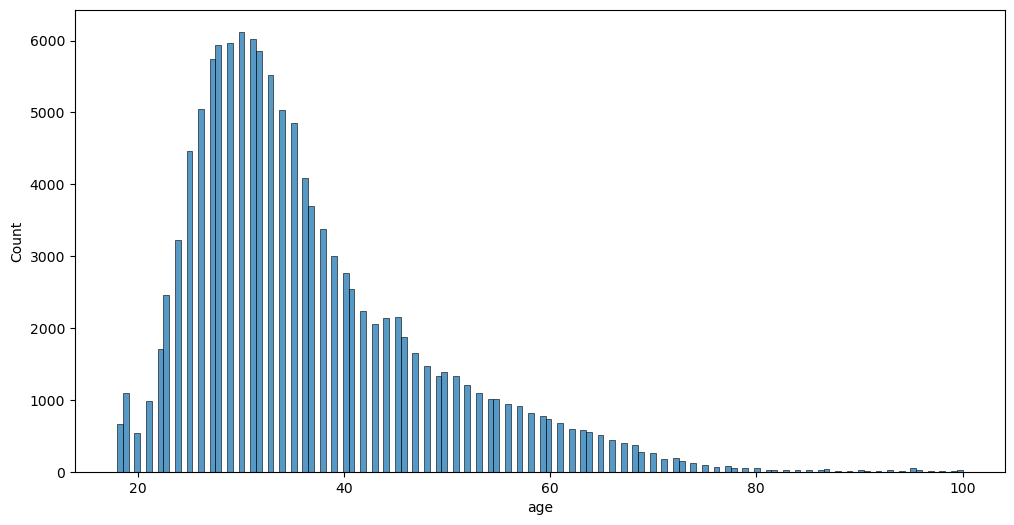

In [226]:
fig=plt.figure(figsize=(12,6))
sns.histplot(main_df[['id','age']].drop_duplicates()['age'])
plt.show()

Majority of customers belong to age group of 25-35 years

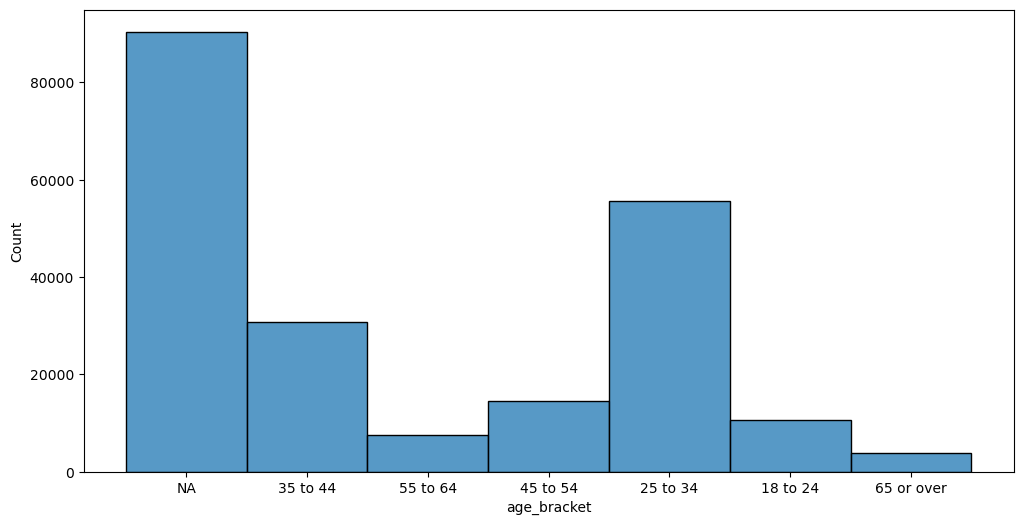

In [28]:
fig=plt.figure(figsize=(12,6))
sns.histplot(main_df[['id','age_bracket']].drop_duplicates()['age_bracket'])
plt.show()

Majority of people on Airbnb belong to age group of 25 to 34. There are very few people beyond the age of 65.

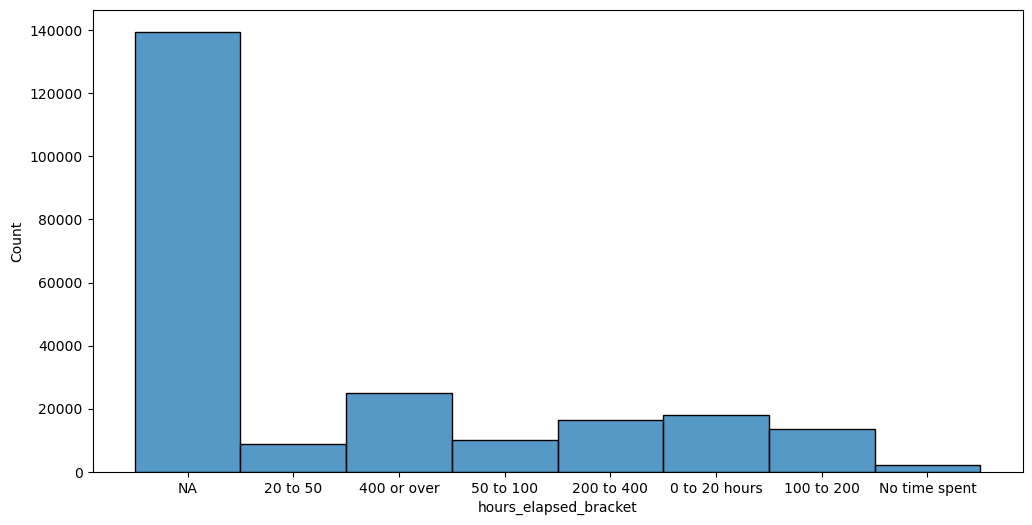

In [31]:
fig=plt.figure(figsize=(12,6))
sns.histplot(main_df[['id','hours_elapsed_bracket']].drop_duplicates()['hours_elapsed_bracket'])
plt.show()

Many people spent 200 or more hours on Airbnb. Many less people spent less than 50 hours.

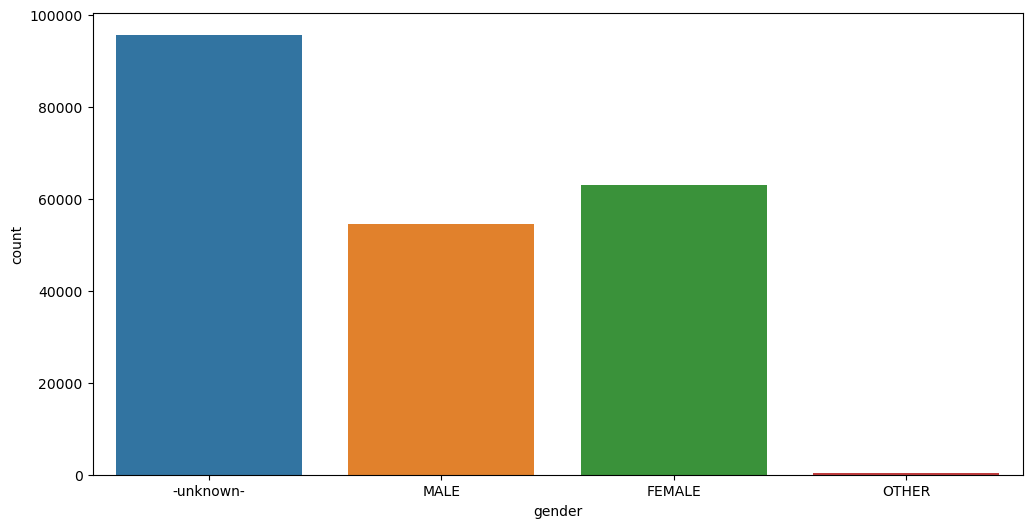

In [32]:
fig=plt.figure(figsize=(12,6))
sns.countplot(x=main_df[['id','gender']].drop_duplicates()['gender'])
plt.show()

We have almost equal number of male and female customers in the dataset

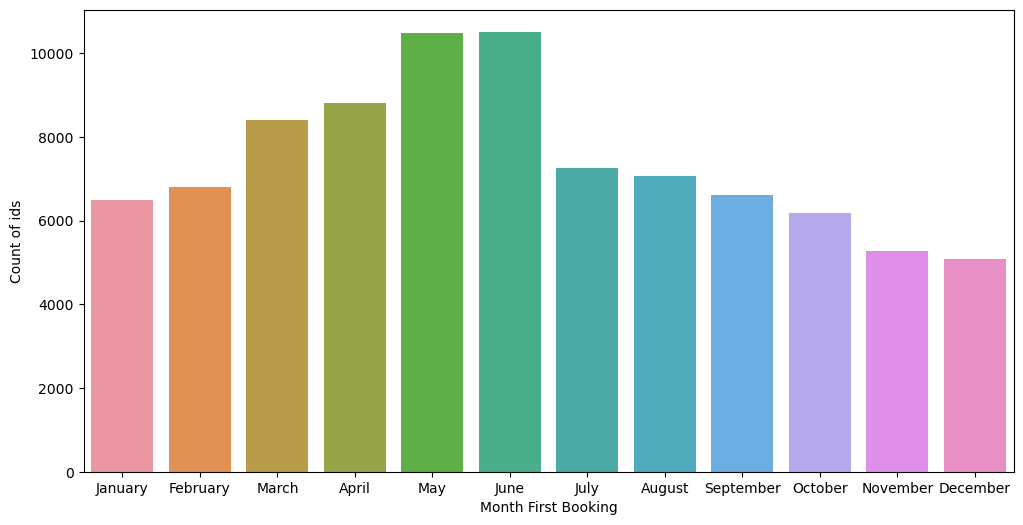

In [34]:
fig=plt.figure(figsize=(12,6))
id_month=main_df[['id','month_first_booking','month_name']].drop_duplicates()
month_trend=id_month.groupby(by=['month_first_booking','month_name'])['id'].count().reset_index().sort_values(by=['month_first_booking'])
sns.barplot(data=month_trend,x='month_name',y='id')
plt.xlabel("Month First Booking")
plt.ylabel("Count of ids")
plt.show()

People majorly booked their destination in month of May and June. There were least bookings in month of December.

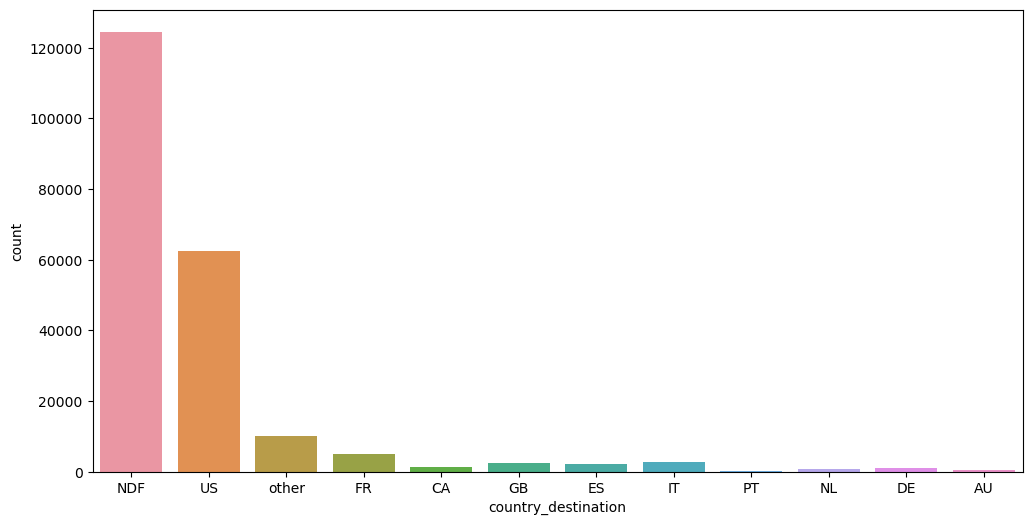

In [35]:
fig=plt.figure(figsize=(12,6))
sns.countplot(x=main_df[['id','country_destination']].drop_duplicates()['country_destination'])
plt.show()

Many people didn't booked any destination whereas mostly people booked US as their destination. This makes sense too as this dataset contains customers from US only. France was the second most preference for US Customers.

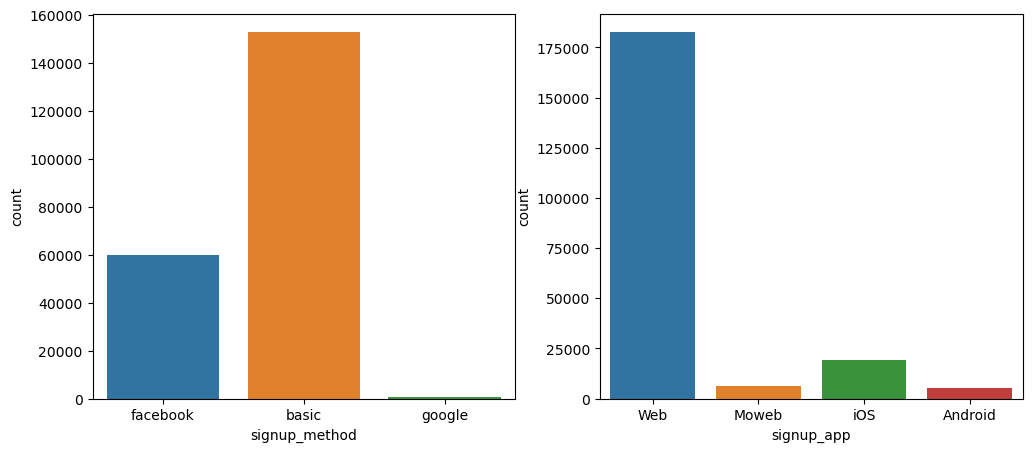

In [36]:
fig=plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x=main_df[['id','signup_method']].drop_duplicates()['signup_method'])
plt.subplot(1,2,2)
sns.countplot(x=main_df[['id','signup_app']].drop_duplicates()['signup_app'])
plt.show()

Most people registered on Airbnb from the official website only and used website to register

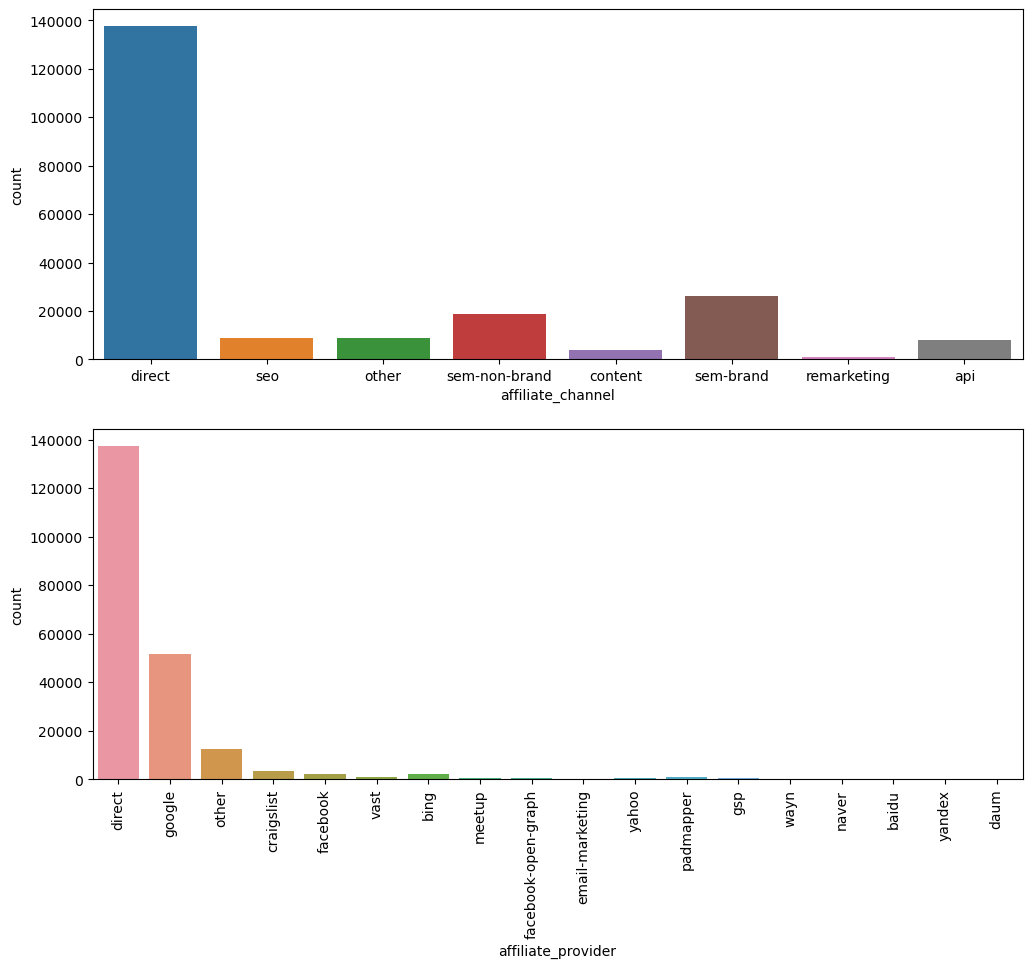

In [37]:
fig=plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
sns.countplot(x=main_df[['id','affiliate_channel']].drop_duplicates()['affiliate_channel'])
plt.subplot(2,1,2)
sns.countplot(x=main_df[['id','affiliate_provider']].drop_duplicates()['affiliate_provider'])
plt.xticks(rotation=90)
plt.show()

Mostly people came onto Airbnb directly rather than through any search engine

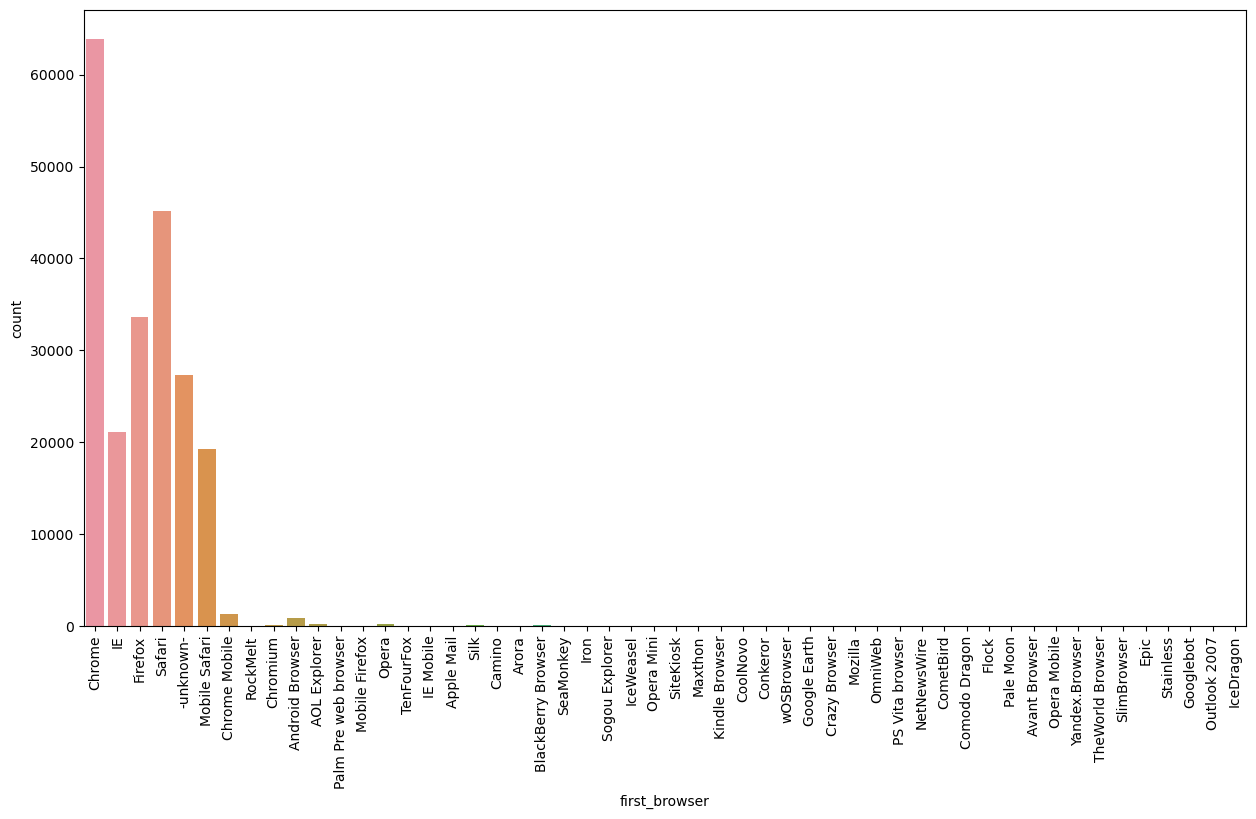

In [38]:
fig=plt.figure(figsize=(15,8))
sns.countplot(x=main_df[['id','first_browser']].drop_duplicates()['first_browser'])
plt.xticks(rotation=90)
plt.show()

Most customers preference was Chrome Browser after that many users tend to use Safari on Mac which shows they are a bit wealthy people

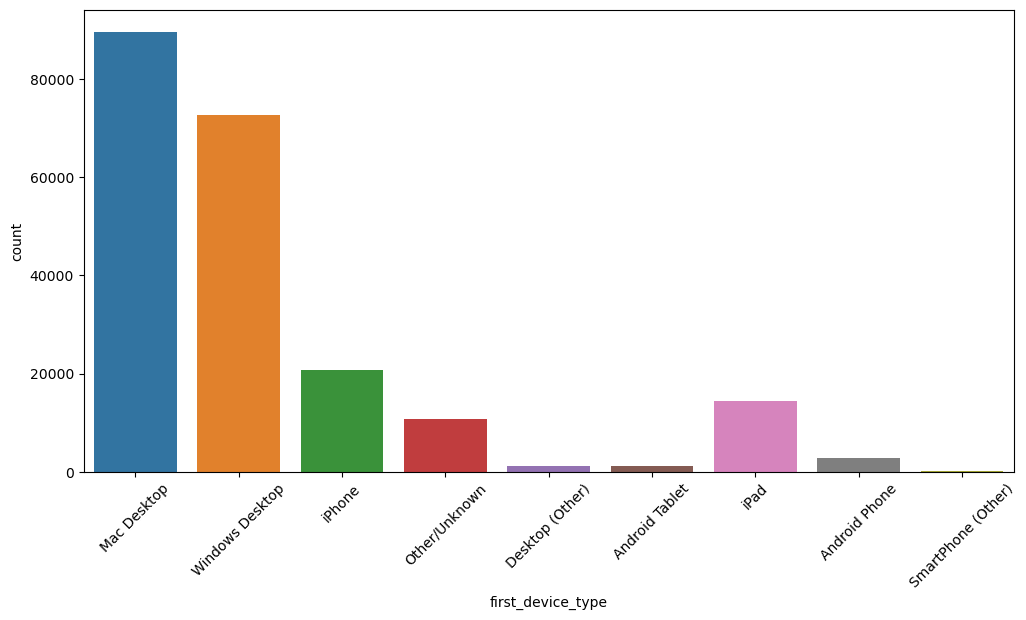

In [39]:
fig=plt.figure(figsize=(12,6))
sns.countplot(x=main_df[['id','first_device_type']].drop_duplicates()['first_device_type'])
plt.xticks(rotation=45)
plt.show()

Mostly people use Mac Desktop as their first device type which knows there are more apple users than windows 

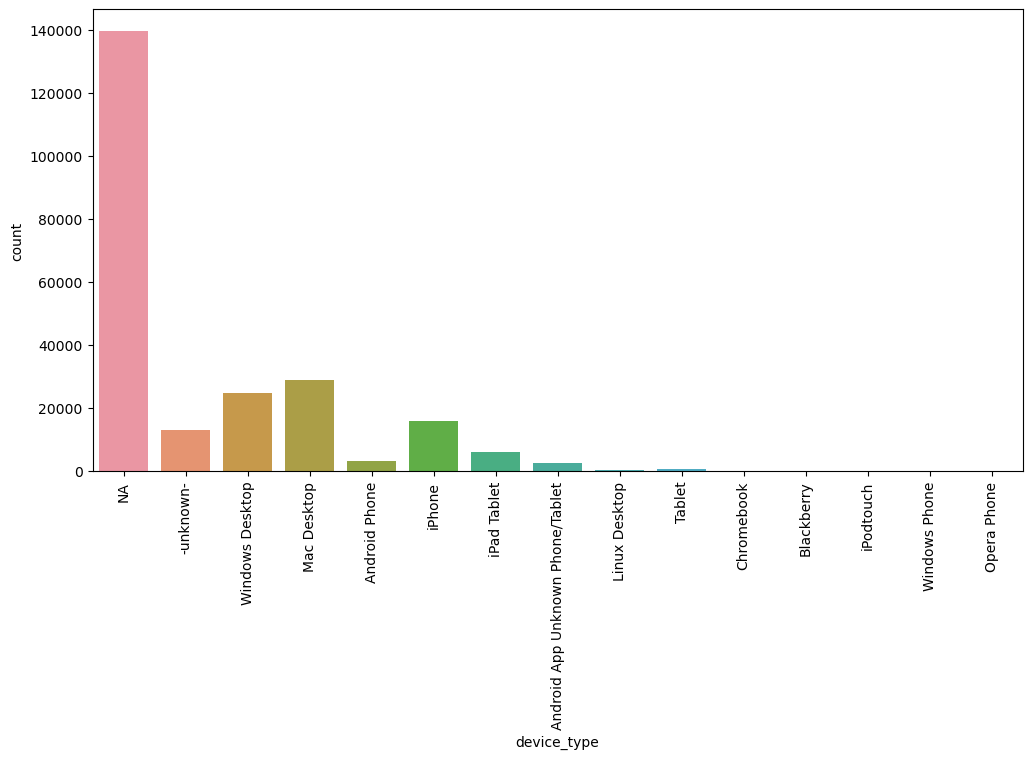

In [41]:
fig=plt.figure(figsize=(12,6))
sns.countplot(x=main_df[['id','device_type']].drop_duplicates()['device_type'])
plt.xticks(rotation=90)
plt.show()

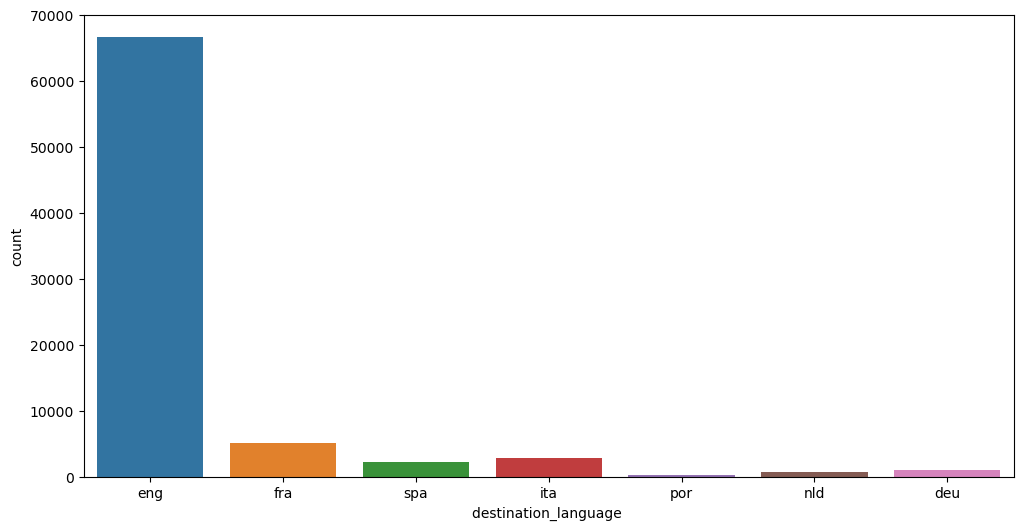

In [42]:
fig=plt.figure(figsize=(12,6))
sns.countplot(x=main_df[['id','destination_language ']].drop_duplicates()['destination_language '])
plt.show()

People tend to visit more where english is spoken after that place with French language was preferred

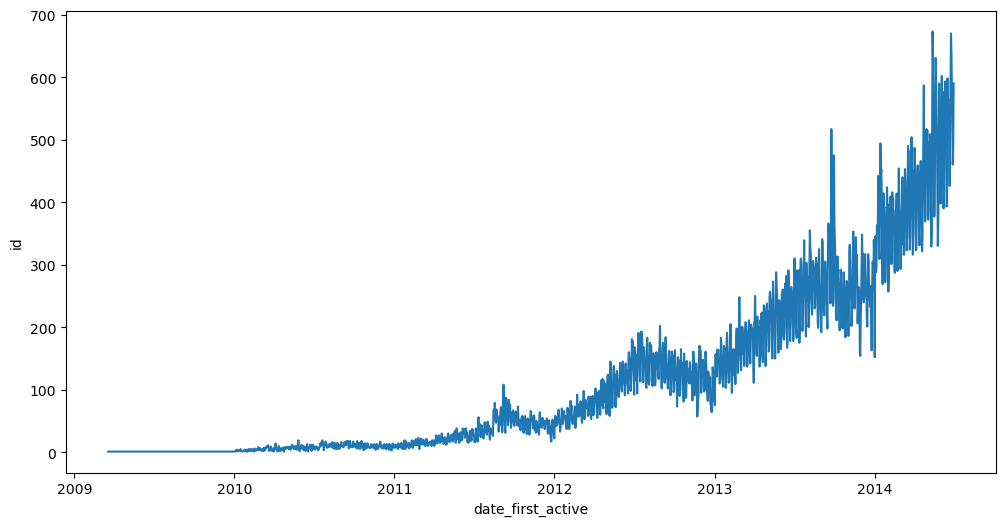

In [43]:
date_time=main_df[['id','date_first_active']].drop_duplicates()
date_time=date_time.groupby(by=['date_first_active'])['id'].count().reset_index()
fig=plt.figure(figsize=(12,6))
sns.lineplot(data=date_time,x='date_first_active',y='id')
plt.show()

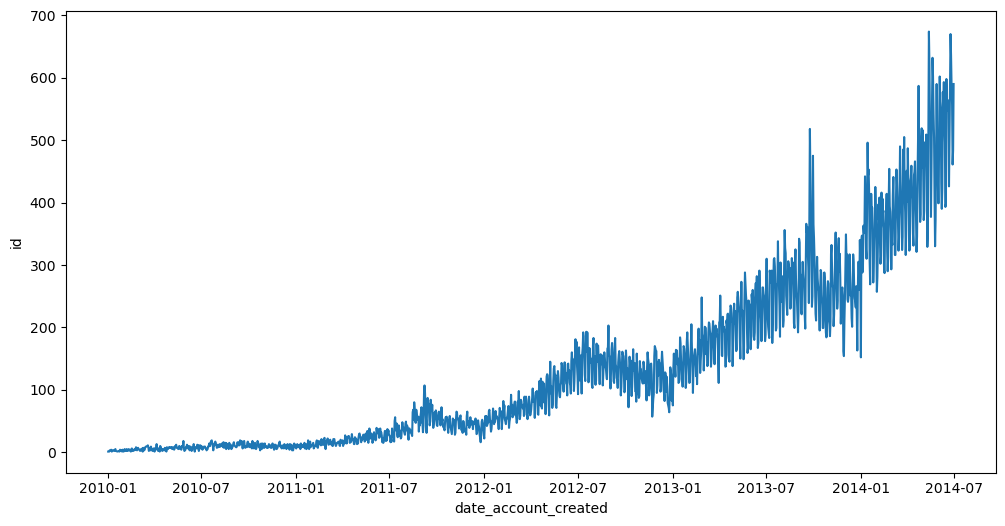

In [44]:
date_time=main_df[['id','date_account_created']].drop_duplicates()
date_time=date_time.groupby(by=['date_account_created'])['id'].count().reset_index()
fig=plt.figure(figsize=(12,6))
sns.lineplot(data=date_time,x='date_account_created',y='id')
plt.show()

The pattern looks similar between date account created and date first active, as it should be. 
These two plots shows that how fast Airbnb has grown over past few years.

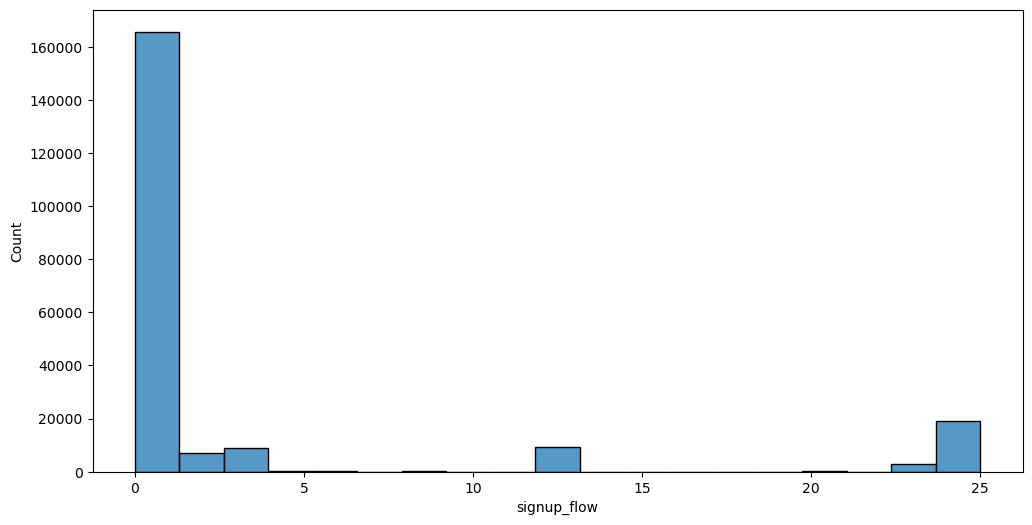

In [45]:
fig=plt.figure(figsize=(12,6))
sns.histplot(data=main_df[['id','signup_flow']].drop_duplicates(),x='signup_flow')
plt.show()

Mostly people were directed to website without any flows

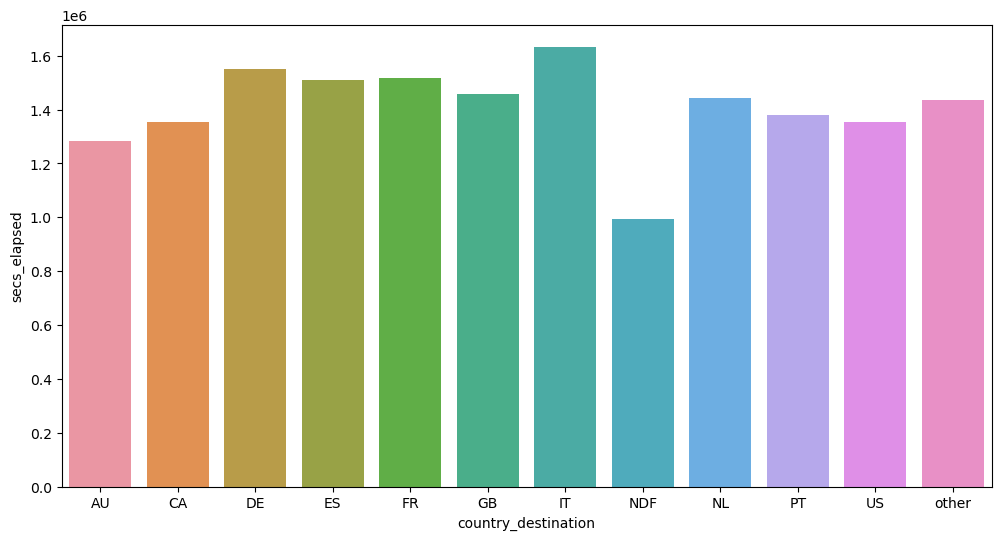

In [46]:
fig=plt.figure(figsize=(12,6))
data=main_df[['id','country_destination','secs_elapsed']].drop_duplicates()
data=data.groupby(by=['country_destination'])['secs_elapsed'].mean().reset_index()
sns.barplot(x='country_destination',y='secs_elapsed',data=data)
plt.show()

On average people who spent most time on Airbnb application tend to book Italy as the destination. People who used Airbnb for very less time tend to book nothing. 

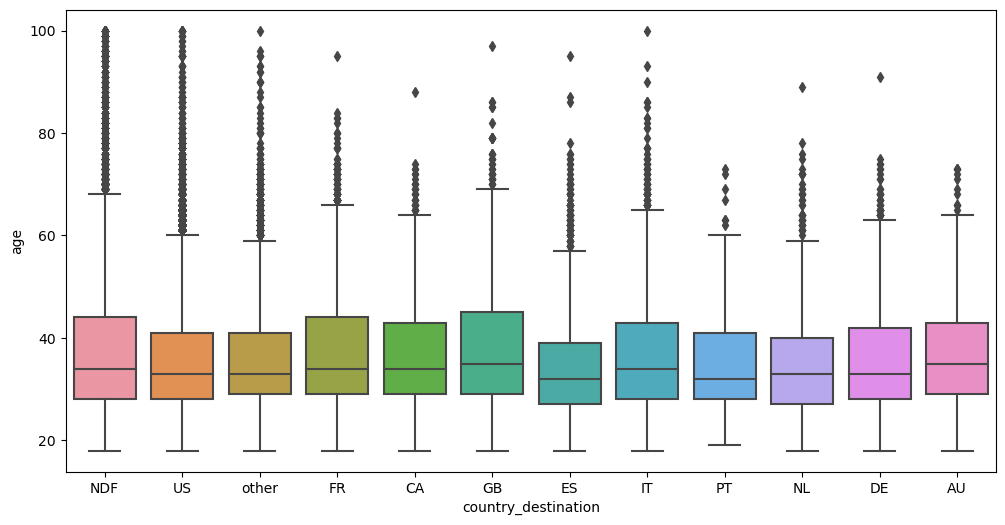

In [47]:
fig=plt.figure(figsize=(12,6))
sns.boxplot(data=main_df[['id','age','country_destination']].drop_duplicates(),x='country_destination',y='age')
plt.show()

There is no major difference between different users who booked different destinations. Only people who are booking for Spain are bit younger on average.

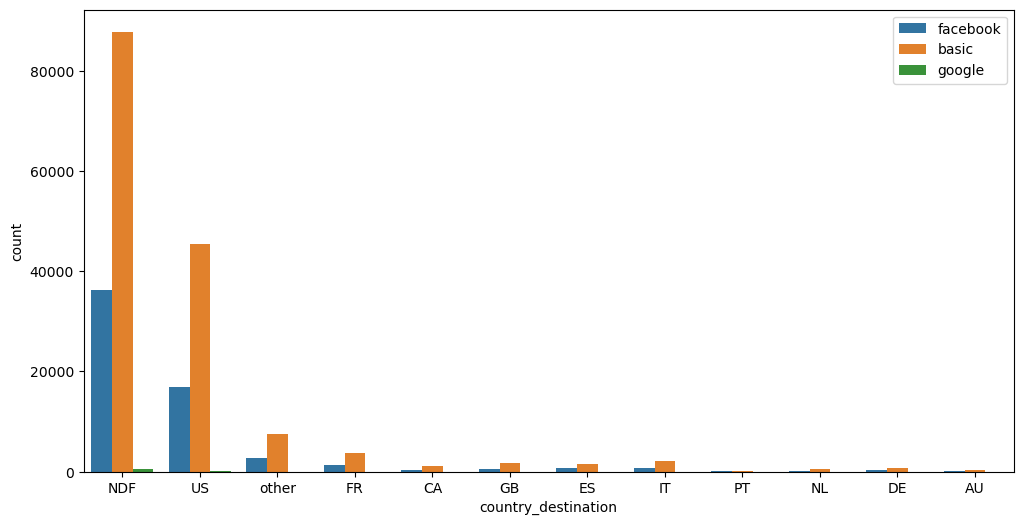

In [48]:
fig=plt.figure(figsize=(12,6))
sns.countplot(data=main_df[['id','country_destination','signup_method']].drop_duplicates(),x='country_destination',hue=
              'signup_method')
plt.legend(loc='upper right')
plt.show()

* Overall, the majority of people signed up via the basic technique, whether or not they had reservations for their destinations.
* Very few people signed up through their google account.
* Basic registration is roughly three times higher than that of Facebook registered users.

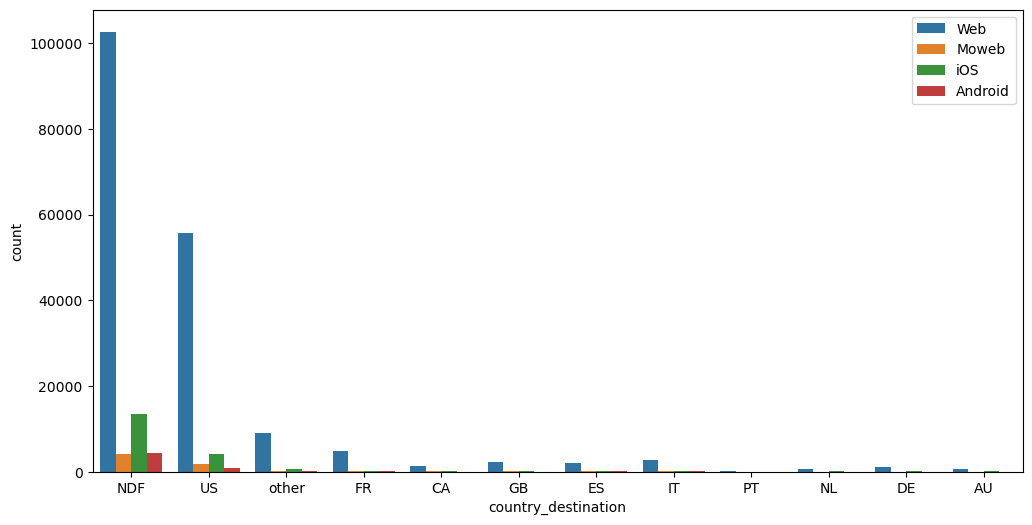

In [49]:
fig=plt.figure(figsize=(12,6))
sns.countplot(data=main_df[['id','country_destination','signup_app']].drop_duplicates(),x='country_destination',hue=
              'signup_app')
plt.legend(loc='upper right')
plt.show()

* Regardless of the type of reservation, customers preferred signing up using the desktop web, then Airbnb from App Store is the second choice.
* Similar amounts of users sign up using mobile browsers or the Airbnb app available from the Google Play Store.

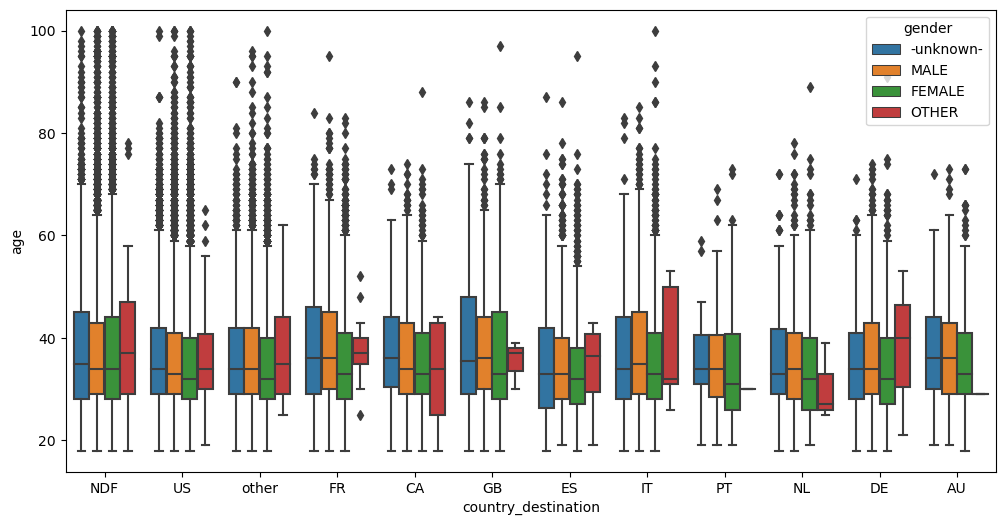

In [50]:
fig=plt.figure(figsize=(12,6))
sns.boxplot(data=main_df[['id','age','country_destination','gender']].drop_duplicates(),x='country_destination',y='age',hue='gender')
plt.show()

* In most of the countries, when gender is other, the median age is bit higher than male and female genders
* People who didn't book any destination, the age of other genders were more than male and female genders
* For Denmark, there were younger males and females than other genders who booked 
* In general, out of of all who booked, the median age of females are younger than males

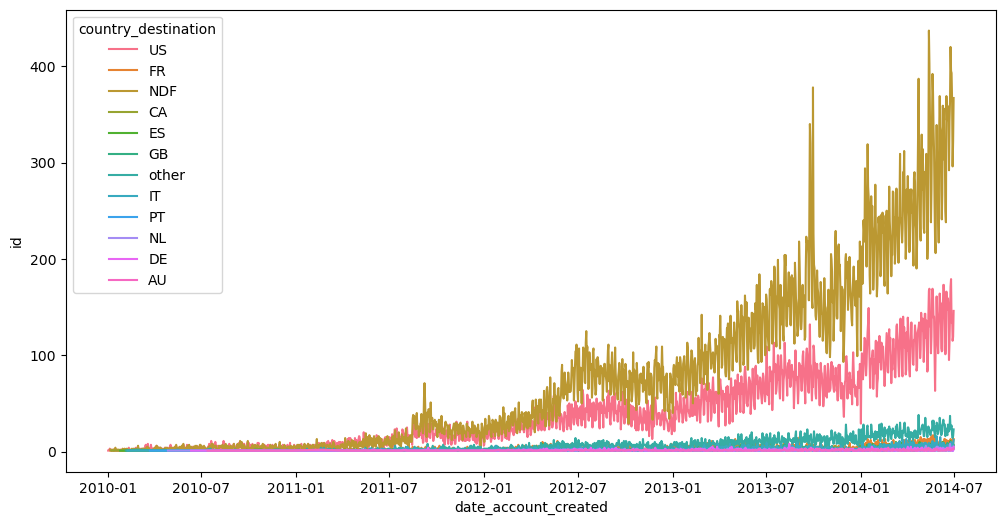

In [51]:
date_time=main_df[['id','date_account_created','country_destination']].drop_duplicates()
date_time=date_time.groupby(by=['date_account_created','country_destination'])['id'].count().reset_index()
fig=plt.figure(figsize=(12,6))
sns.lineplot(data=date_time,x='date_account_created',y='id',hue='country_destination')
plt.show()

* Over the past few years, the majority of people who created accounts but didn't book any destinations have climbed quickly.
* Following that, a large increase was seen in those who opened accounts and selected the US as their destination. That is clear given that US consumers are included in the dataset.

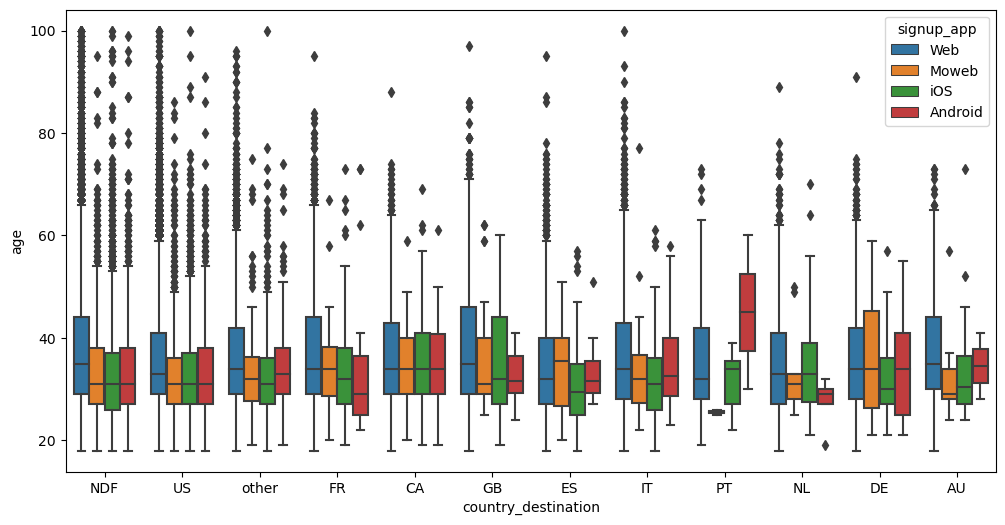

In [52]:
fig=plt.figure(figsize=(12,6))
sns.boxplot(data=main_df[['id','age','country_destination','signup_app']].drop_duplicates(),x='country_destination',
            y='age',hue='signup_app')
plt.show()

* The average age of customers who selected Portugal as their travel destination using the Airbnb app on the Google Play Store is significantly higher than that of all other customers.
* In a same vein, those who booked either France or the Netherlands using an Android phone are, on average, younger than everyone else.
* People who signed up using a web browser but did not make any reservations are older than those who joined up using other platforms.
* Regardless of how they sign up, the average age of persons making reservations for Canada is the same.

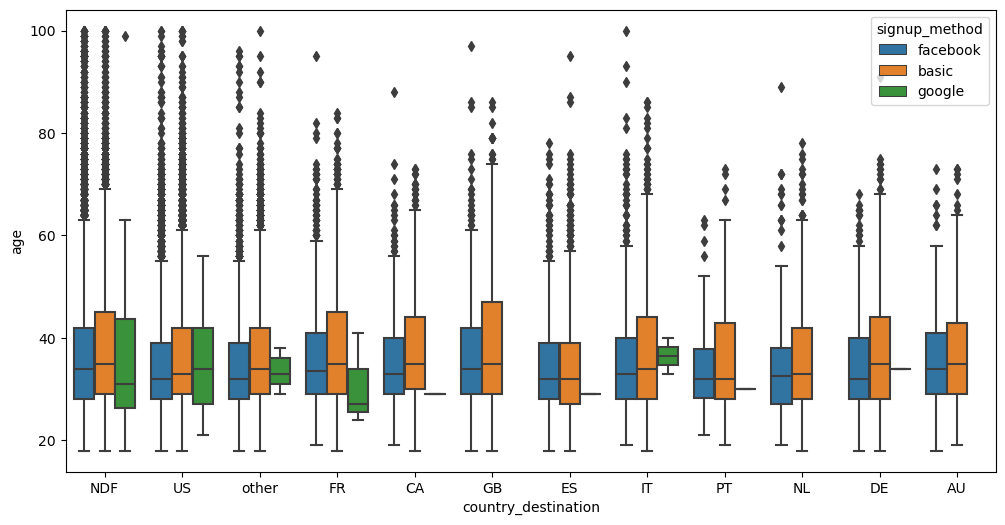

In [53]:
fig=plt.figure(figsize=(12,6))
sns.boxplot(data=main_df[['id','age','country_destination','signup_method']].drop_duplicates(),x='country_destination',y='age',
            hue='signup_method')
plt.show()

* The average age of those who signed up using Facebook and Basic methods differs only little.
* People who signed up using Google and either chose France as their destination or made no reservations at all tended to be younger than those who used Facebook and more traditional ways.

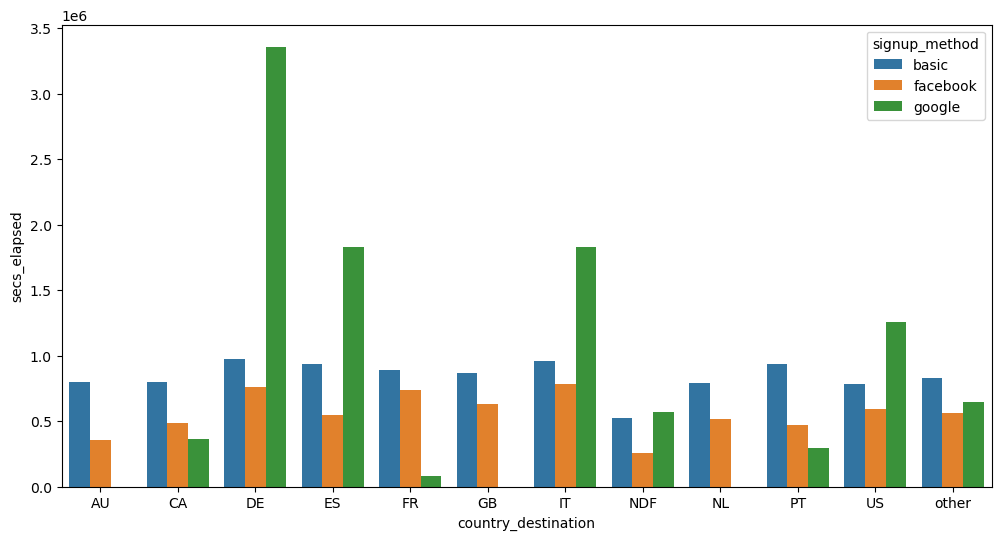

In [54]:
fig=plt.figure(figsize=(12,6))
data=main_df[['id','country_destination','secs_elapsed','signup_method']].drop_duplicates()
data=data.groupby(by=['country_destination','signup_method'])['secs_elapsed'].median().reset_index()
sns.barplot(x='country_destination',y='secs_elapsed',data=data,hue='signup_method')
plt.show()

* People who signed up using Google and spent lot of time on Airbnb booked Germany as the destination.
* People who signed up using Google and spent lot of time on Airbnb tend to book any destination from Germany, Spain or Italy.
* There is a quite difference in usage of airbnb between people who booked Australia, California or Portugal.

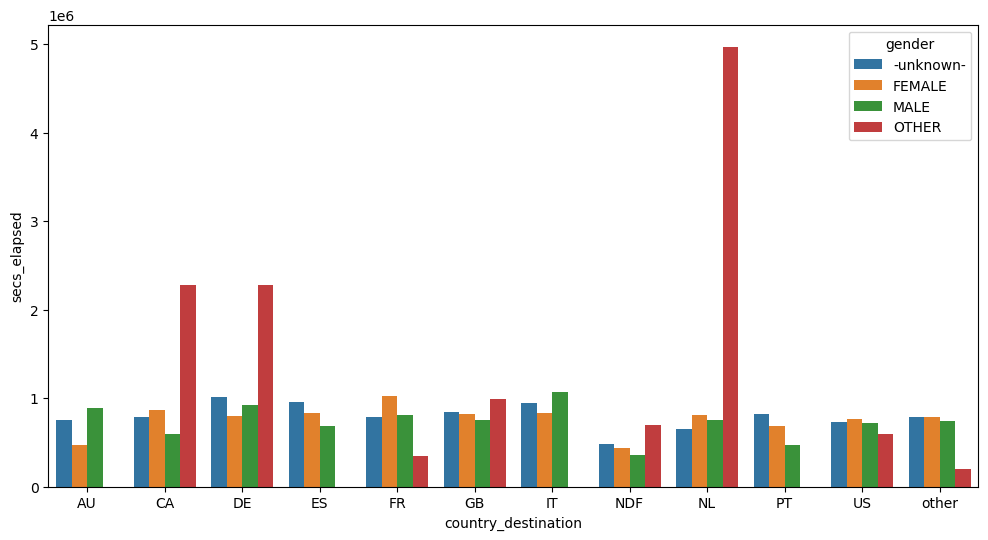

In [55]:
fig=plt.figure(figsize=(12,6))
data=main_df[['id','country_destination','secs_elapsed','gender']].drop_duplicates()
data=data.groupby(by=['country_destination','gender'])['secs_elapsed'].median().reset_index()
sns.barplot(x='country_destination',y='secs_elapsed',data=data,hue='gender')
plt.show()

* People from other gender who spent lot of time on Airbnb, booked Netherlands.
* Very few people from other gender booked for Australia, Spain, Italy or Portugal.

# Prediction 

## Defining probabilities

In [279]:
data=main_df[['id','age_bracket','country_destination']].drop_duplicates()
age_bracket_prob=np.round(pd.crosstab(data['country_destination'],data['age_bracket'],normalize='columns'),4).reset_index()

In [280]:
data=main_df[['id','gender','country_destination']].drop_duplicates()
gender_prob=np.round(pd.crosstab(data['country_destination'],data['gender'],normalize='columns'),4).reset_index()

In [281]:
data=main_df[['id','signup_method','country_destination']].drop_duplicates()
signup_method_prob=np.round(pd.crosstab(data['country_destination'],data['signup_method'],normalize='columns'),4).reset_index()

In [282]:
data=main_df[['id','device_type','country_destination']].drop_duplicates()
device_type_prob=np.round(pd.crosstab(data['country_destination'],data['device_type'],normalize='columns'),4).reset_index()

In [283]:
data=main_df[['id','signup_app','country_destination']].drop_duplicates()
signup_app_prob=np.round(pd.crosstab(data['country_destination'],data['signup_app'],normalize='columns'),4).reset_index()

In [284]:
data=main_df[['id','hours_elapsed_bracket','country_destination']].drop_duplicates()
hours_elapsed_bracket_prob=np.round(pd.crosstab(data['country_destination'],data['hours_elapsed_bracket'],normalize='columns'),4).reset_index()

In [285]:
def predict(df):
    l=main_df['country_destination'].unique()
    countries_dict={}
    for ele in l:
        countries_dict[ele]=0
    for ele in l:
        countries_dict[ele]+=gender_prob[gender_prob['country_destination']==ele][df['gender']].values[0]
        countries_dict[ele]+=age_bracket_prob[age_bracket_prob['country_destination']==ele][df['age_bracket']].values[0]
        countries_dict[ele]+=signup_method_prob[signup_method_prob['country_destination']==ele][df['signup_method']].values[0]
        countries_dict[ele]+=device_type_prob[device_type_prob['country_destination']==ele][df['device_type']].values[0]
        countries_dict[ele]+=signup_app_prob[signup_app_prob['country_destination']==ele][df['signup_app']].values[0]
        countries_dict[ele]+=hours_elapsed_bracket_prob[hours_elapsed_bracket_prob['country_destination']==ele][df['hours_elapsed_bracket']].values[0]
    Keymax = sorted(zip(countries_dict.values(), countries_dict.keys()))[-1][1]
    return Keymax

### Extracting database with same country ratio as original to work upon

In [286]:
df=main_df[['id','age_bracket','gender','signup_method','device_type','signup_app','hours_elapsed_bracket',
            'country_destination']].drop_duplicates()

In [287]:
X_train, X_test, y_train, y_test = train_test_split(df, df['country_destination'], 
                                                    test_size=0.1, random_state=42, stratify=df['country_destination'])

In [112]:
X_test.shape

(23661, 8)

In [113]:
X_train.shape

(212943, 8)

## Checking THRESHOLD value for NDF

In [118]:
def NDF_Prob(df):
    l=main_df['country_destination'].unique()
    countries_dict={}
    for ele in l:
        countries_dict[ele]=0
    for ele in l:
        countries_dict[ele]+=gender_prob[gender_prob['country_destination']==ele][df['gender']].values[0]
        countries_dict[ele]+=age_bracket_prob[age_bracket_prob['country_destination']==ele][df['age_bracket']].values[0]
        countries_dict[ele]+=signup_method_prob[signup_method_prob['country_destination']==ele][df['signup_method']].values[0]
        countries_dict[ele]+=device_type_prob[device_type_prob['country_destination']==ele][df['device_type']].values[0]
        countries_dict[ele]+=signup_app_prob[signup_app_prob['country_destination']==ele][df['signup_app']].values[0]
        countries_dict[ele]+=hours_elapsed_bracket_prob[hours_elapsed_bracket_prob['country_destination']==ele][df['hours_elapsed_bracket']].values[0]
    return countries_dict['NDF']

In [119]:
X_test['NDF_Prob_total']=X_test.apply(NDF_Prob,axis=1)

In [120]:
NDF_True=X_test[X_test['country_destination']=='NDF']
NDF_False=X_test[X_test['country_destination']!='NDF']

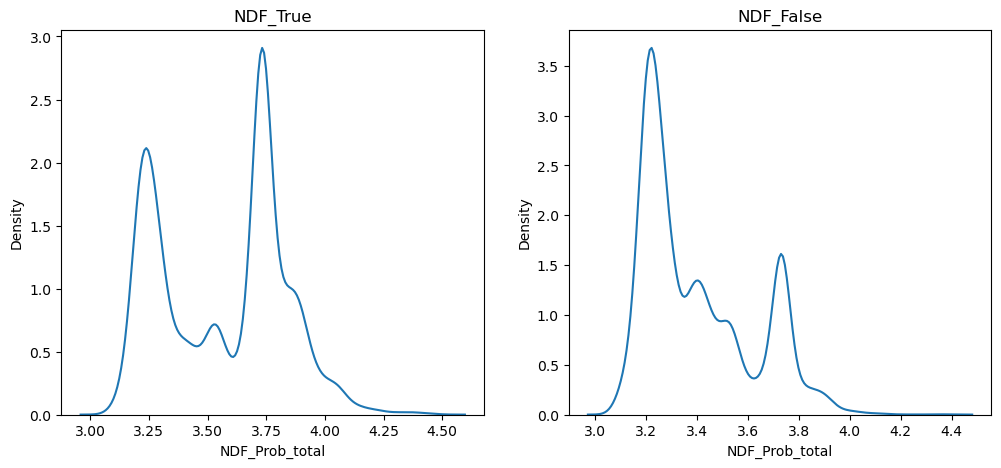

In [121]:
fig=plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.kdeplot(NDF_True['NDF_Prob_total'])
plt.title("NDF_True")
plt.subplot(1,2,2)
sns.kdeplot(NDF_False['NDF_Prob_total'])
plt.title("NDF_False")
plt.show()

## Checking THRESHOLD value for US

In [122]:
def US_Prob(df):
    l=main_df['country_destination'].unique()
    countries_dict={}
    for ele in l:
        countries_dict[ele]=0
    for ele in l:
        countries_dict[ele]+=gender_prob[gender_prob['country_destination']==ele][df['gender']].values[0]
        countries_dict[ele]+=age_bracket_prob[age_bracket_prob['country_destination']==ele][df['age_bracket']].values[0]
        countries_dict[ele]+=signup_method_prob[signup_method_prob['country_destination']==ele][df['signup_method']].values[0]
        countries_dict[ele]+=device_type_prob[device_type_prob['country_destination']==ele][df['device_type']].values[0]
        countries_dict[ele]+=signup_app_prob[signup_app_prob['country_destination']==ele][df['signup_app']].values[0]
        countries_dict[ele]+=hours_elapsed_bracket_prob[hours_elapsed_bracket_prob['country_destination']==ele][df['hours_elapsed_bracket']].values[0]
    return countries_dict['US']

In [123]:
X_test['US_Prob_total']=X_test.apply(US_Prob,axis=1)

In [124]:
US_True=X_test[X_test['country_destination']=='US']
US_False=X_test[X_test['country_destination']!='US']

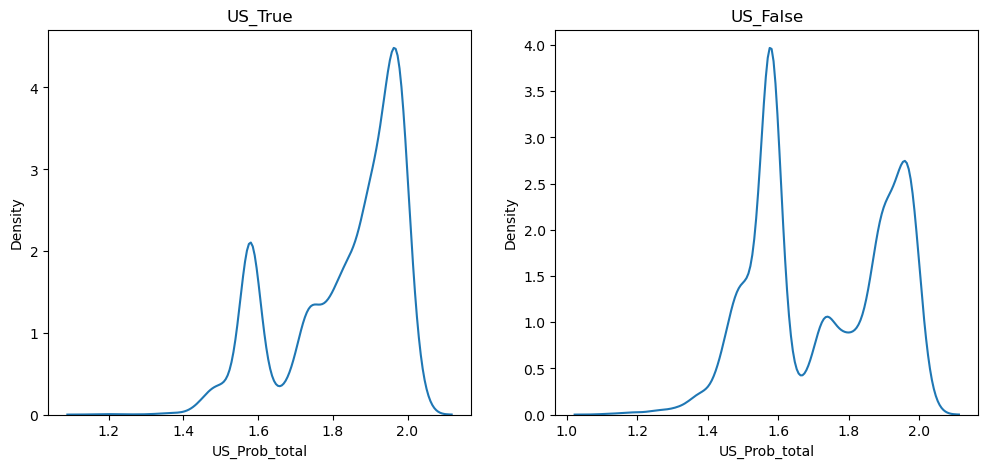

In [125]:
fig=plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.kdeplot(US_True['US_Prob_total'])
plt.title("US_True")
plt.subplot(1,2,2)
sns.kdeplot(US_False['US_Prob_total'])
plt.title("US_False")
plt.show()

## Checking THRESHOLD value for OTHER

In [126]:
def other_Prob(df):
    l=main_df['country_destination'].unique()
    countries_dict={}
    for ele in l:
        countries_dict[ele]=0
    for ele in l:
        countries_dict[ele]+=gender_prob[gender_prob['country_destination']==ele][df['gender']].values[0]
        countries_dict[ele]+=age_bracket_prob[age_bracket_prob['country_destination']==ele][df['age_bracket']].values[0]
        countries_dict[ele]+=signup_method_prob[signup_method_prob['country_destination']==ele][df['signup_method']].values[0]
        countries_dict[ele]+=device_type_prob[device_type_prob['country_destination']==ele][df['device_type']].values[0]
        countries_dict[ele]+=signup_app_prob[signup_app_prob['country_destination']==ele][df['signup_app']].values[0]
        countries_dict[ele]+=hours_elapsed_bracket_prob[hours_elapsed_bracket_prob['country_destination']==ele][df['hours_elapsed_bracket']].values[0]
    return countries_dict['other']

In [127]:
X_test['other_Prob_total']=X_test.apply(other_Prob,axis=1)

In [128]:
other_True=X_test[X_test['country_destination']=='other']
other_False=X_test[X_test['country_destination']!='other']

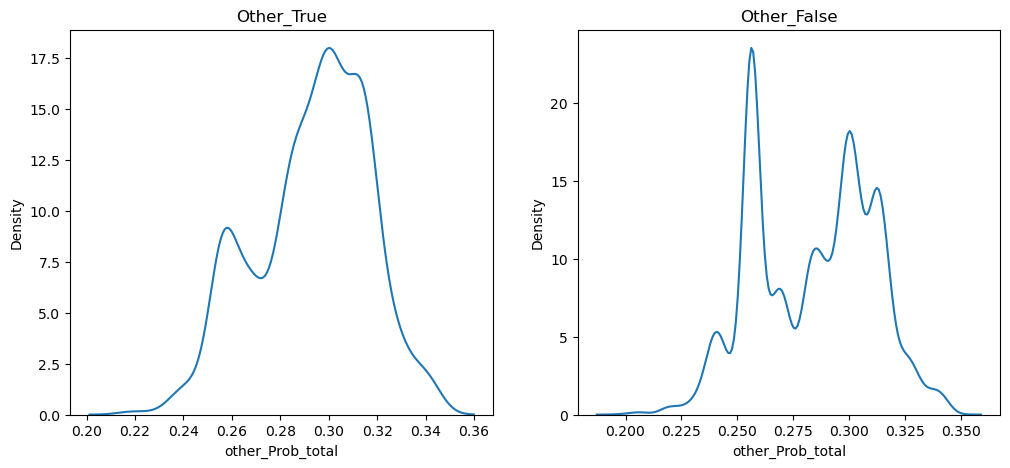

In [129]:
fig=plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.kdeplot(other_True['other_Prob_total'])
plt.title("Other_True")
plt.subplot(1,2,2)
sns.kdeplot(other_False['other_Prob_total'])
plt.title("Other_False")
plt.show()

## Checking THRESHOLD value for FR

In [130]:
def FR_Prob(df):
    l=main_df['country_destination'].unique()
    countries_dict={}
    for ele in l:
        countries_dict[ele]=0
    for ele in l:
        countries_dict[ele]+=gender_prob[gender_prob['country_destination']==ele][df['gender']].values[0]
        countries_dict[ele]+=age_bracket_prob[age_bracket_prob['country_destination']==ele][df['age_bracket']].values[0]
        countries_dict[ele]+=signup_method_prob[signup_method_prob['country_destination']==ele][df['signup_method']].values[0]
        countries_dict[ele]+=device_type_prob[device_type_prob['country_destination']==ele][df['device_type']].values[0]
        countries_dict[ele]+=signup_app_prob[signup_app_prob['country_destination']==ele][df['signup_app']].values[0]
        countries_dict[ele]+=hours_elapsed_bracket_prob[hours_elapsed_bracket_prob['country_destination']==ele][df['hours_elapsed_bracket']].values[0]
    return countries_dict['FR']

In [131]:
X_test['FR_Prob_total']=X_test.apply(FR_Prob,axis=1)

In [132]:
FR_True=X_test[X_test['country_destination']=='FR']
FR_False=X_test[X_test['country_destination']!='FR']

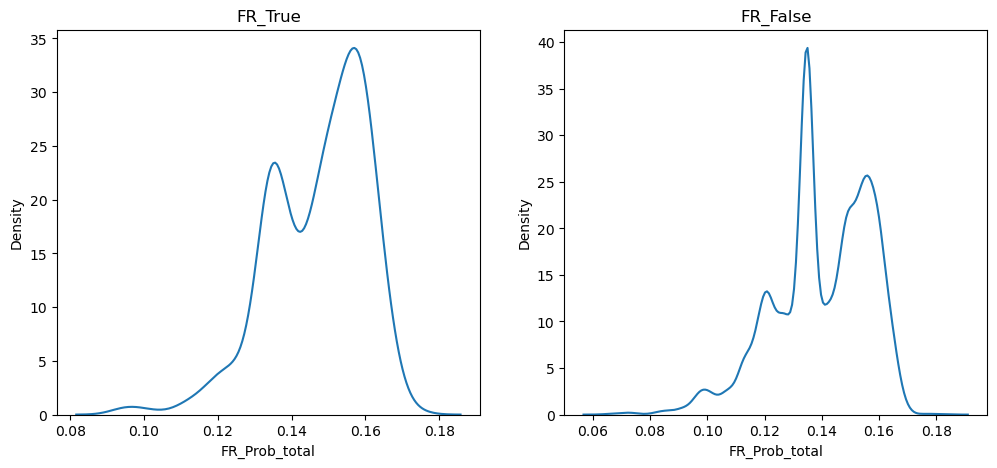

In [133]:
fig=plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.kdeplot(FR_True['FR_Prob_total'])
plt.title("FR_True")
plt.subplot(1,2,2)
sns.kdeplot(FR_False['FR_Prob_total'])
plt.title("FR_False")
plt.show()

## Checking THRESHOLD value for IT

In [134]:
def IT_Prob(df):
    l=main_df['country_destination'].unique()
    countries_dict={}
    for ele in l:
        countries_dict[ele]=0
    for ele in l:
        countries_dict[ele]+=gender_prob[gender_prob['country_destination']==ele][df['gender']].values[0]
        countries_dict[ele]+=age_bracket_prob[age_bracket_prob['country_destination']==ele][df['age_bracket']].values[0]
        countries_dict[ele]+=signup_method_prob[signup_method_prob['country_destination']==ele][df['signup_method']].values[0]
        countries_dict[ele]+=device_type_prob[device_type_prob['country_destination']==ele][df['device_type']].values[0]
        countries_dict[ele]+=signup_app_prob[signup_app_prob['country_destination']==ele][df['signup_app']].values[0]
        countries_dict[ele]+=hours_elapsed_bracket_prob[hours_elapsed_bracket_prob['country_destination']==ele][df['hours_elapsed_bracket']].values[0]
    return countries_dict['IT']

In [135]:
X_test['IT_Prob_total']=X_test.apply(IT_Prob,axis=1)

In [136]:
IT_True=X_test[X_test['country_destination']=='IT']
IT_False=X_test[X_test['country_destination']!='IT']

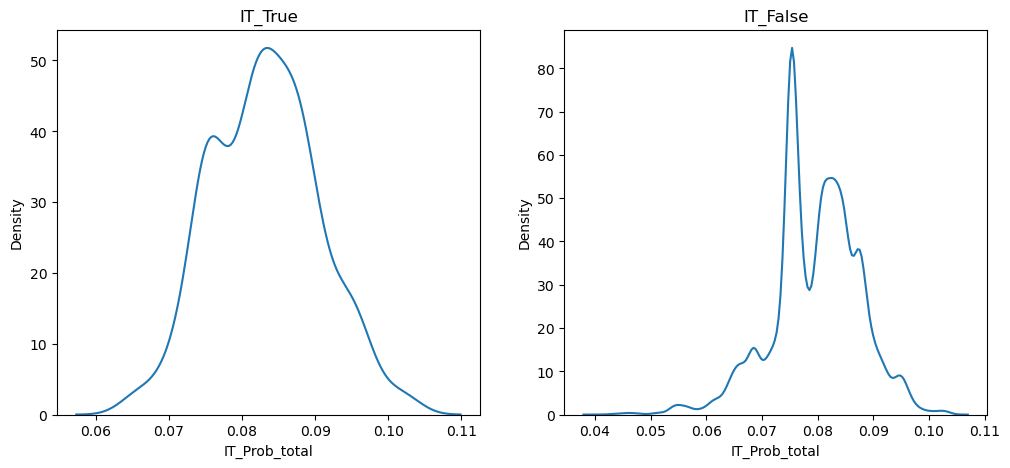

In [137]:
fig=plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.kdeplot(IT_True['IT_Prob_total'])
plt.title("IT_True")
plt.subplot(1,2,2)
sns.kdeplot(IT_False['IT_Prob_total'])
plt.title("IT_False")
plt.show()

## Checking THRESHOLD value for GB

In [138]:
def GB_Prob(df):
    l=main_df['country_destination'].unique()
    countries_dict={}
    for ele in l:
        countries_dict[ele]=0
    for ele in l:
        countries_dict[ele]+=gender_prob[gender_prob['country_destination']==ele][df['gender']].values[0]
        countries_dict[ele]+=age_bracket_prob[age_bracket_prob['country_destination']==ele][df['age_bracket']].values[0]
        countries_dict[ele]+=signup_method_prob[signup_method_prob['country_destination']==ele][df['signup_method']].values[0]
        countries_dict[ele]+=device_type_prob[device_type_prob['country_destination']==ele][df['device_type']].values[0]
        countries_dict[ele]+=signup_app_prob[signup_app_prob['country_destination']==ele][df['signup_app']].values[0]
        countries_dict[ele]+=hours_elapsed_bracket_prob[hours_elapsed_bracket_prob['country_destination']==ele][df['hours_elapsed_bracket']].values[0]
    return countries_dict['GB']

In [139]:
X_test['GB_Prob_total']=X_test.apply(GB_Prob,axis=1)

In [140]:
GB_True=X_test[X_test['country_destination']=='GB']
GB_False=X_test[X_test['country_destination']!='GB']

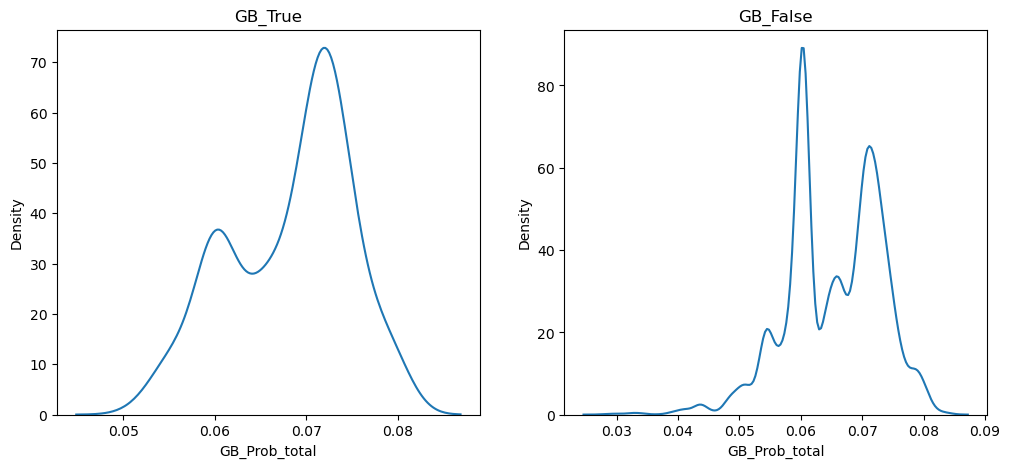

In [141]:
fig=plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.kdeplot(GB_True['GB_Prob_total'])
plt.title("GB_True")
plt.subplot(1,2,2)
sns.kdeplot(GB_False['GB_Prob_total'])
plt.title("GB_False")
plt.show()

## Checking THRESHOLD value for  ES

In [171]:
def ES_Prob(df):
    l=main_df['country_destination'].unique()
    countries_dict={}
    for ele in l:
        countries_dict[ele]=0
    for ele in l:
        countries_dict[ele]+=gender_prob[gender_prob['country_destination']==ele][df['gender']].values[0]
        countries_dict[ele]+=age_bracket_prob[age_bracket_prob['country_destination']==ele][df['age_bracket']].values[0]
        countries_dict[ele]+=signup_method_prob[signup_method_prob['country_destination']==ele][df['signup_method']].values[0]
        countries_dict[ele]+=device_type_prob[device_type_prob['country_destination']==ele][df['device_type']].values[0]
        countries_dict[ele]+=signup_app_prob[signup_app_prob['country_destination']==ele][df['signup_app']].values[0]
        countries_dict[ele]+=hours_elapsed_bracket_prob[hours_elapsed_bracket_prob['country_destination']==ele][df['hours_elapsed_bracket']].values[0]
    return countries_dict['ES']

In [172]:
X_test['ES_Prob_total']=X_test.apply(ES_Prob,axis=1)

In [173]:
ES_True=X_test[X_test['country_destination']=='ES']
ES_False=X_test[X_test['country_destination']!='ES']

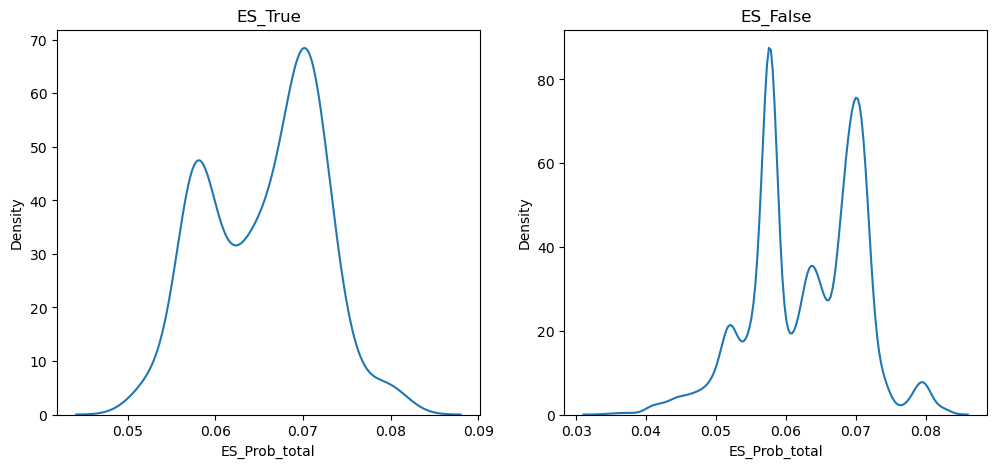

In [174]:
fig=plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.kdeplot(ES_True['ES_Prob_total'])
plt.title("ES_True")
plt.subplot(1,2,2)
sns.kdeplot(ES_False['ES_Prob_total'])
plt.title("ES_False")
plt.show()

# Checking THRESHOLD value for CA

In [175]:
def CA_Prob(df):
    l=main_df['country_destination'].unique()
    countries_dict={}
    for ele in l:
        countries_dict[ele]=0
    for ele in l:
        countries_dict[ele]+=gender_prob[gender_prob['country_destination']==ele][df['gender']].values[0]
        countries_dict[ele]+=age_bracket_prob[age_bracket_prob['country_destination']==ele][df['age_bracket']].values[0]
        countries_dict[ele]+=signup_method_prob[signup_method_prob['country_destination']==ele][df['signup_method']].values[0]
        countries_dict[ele]+=device_type_prob[device_type_prob['country_destination']==ele][df['device_type']].values[0]
        countries_dict[ele]+=signup_app_prob[signup_app_prob['country_destination']==ele][df['signup_app']].values[0]
        countries_dict[ele]+=hours_elapsed_bracket_prob[hours_elapsed_bracket_prob['country_destination']==ele][df['hours_elapsed_bracket']].values[0]
    return countries_dict['CA']

In [176]:
X_test['CA_Prob_total']=X_test.apply(CA_Prob,axis=1)

In [177]:
CA_True=X_test[X_test['country_destination']=='CA']
CA_False=X_test[X_test['country_destination']!='CA']

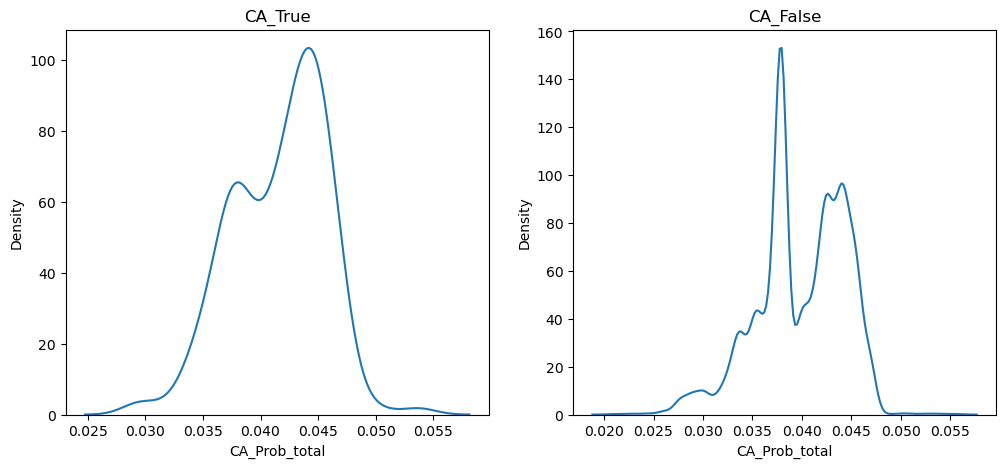

In [178]:
fig=plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.kdeplot(CA_True['CA_Prob_total'])
plt.title("CA_True")
plt.subplot(1,2,2)
sns.kdeplot(CA_False['CA_Prob_total'])
plt.title("CA_False")
plt.show()

# Final prediction

In [288]:
def final_predict(df):
    l=main_df['country_destination'].unique()
    countries_dict={}
    for ele in l:
        countries_dict[ele]=0
    for ele in l:
        countries_dict[ele]+=gender_prob[gender_prob['country_destination']==ele][df['gender']].values[0]
        countries_dict[ele]+=age_bracket_prob[age_bracket_prob['country_destination']==ele][df['age_bracket']].values[0]
        countries_dict[ele]+=signup_method_prob[signup_method_prob['country_destination']==ele][df['signup_method']].values[0]
        countries_dict[ele]+=device_type_prob[device_type_prob['country_destination']==ele][df['device_type']].values[0]
        countries_dict[ele]+=signup_app_prob[signup_app_prob['country_destination']==ele][df['signup_app']].values[0]
        countries_dict[ele]+=hours_elapsed_bracket_prob[hours_elapsed_bracket_prob['country_destination']==ele][df['hours_elapsed_bracket']].values[0]
    if countries_dict['NDF']>3.55 and countries_dict['NDF']<4.15:
        Keymax = sorted(zip(countries_dict.values(), countries_dict.keys()))[-1][1]
    elif countries_dict['US']>1.8:
        Keymax = 'US'
    elif countries_dict['other']>0.28:
        Keymax = 'other'
    elif countries_dict['FR']>0.14:
        Keymax = 'FR'
    elif countries_dict['IT']>0.07 and countries_dict['IT']<0.1:
        Keymax = 'IT'
    elif countries_dict['GB']>0.05 or countries_dict['ES']>0.05:
        Keymax = sorted(zip(countries_dict.values(), countries_dict.keys()))[-6][1]
    else:
        Keymax = sorted(zip(countries_dict.values(), countries_dict.keys()))[-8][1]
    return Keymax

In [289]:
total=0
for _ in range(5):
    practice_df=main_df.sample(n=20000)
    practice_df['Predicted']=practice_df.apply(final_predict,axis=1)
    total+=(len(practice_df[practice_df['country_destination']==practice_df['Predicted']])/len(practice_df))*100
print("Final:",total/5)

Final: 51.218


## Applying prediction to test_users dataframe

In [290]:
test_users=pd.read_csv(r"D:\Rahul\Scaler\DSML Portfolio Project\test_users.csv")

In [291]:
test_df=pd.merge(test_users,grouped_sessions,how='left',left_on='id',right_on='user_id')

In [292]:
test_df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,user_id,device_type,secs_elapsed
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,5uwns89zht,-unknown-,119187.0
1,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,5uwns89zht,iPhone,0.0
2,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,jtl0dijy2j,-unknown-,172866.0
3,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,jtl0dijy2j,iPhone,77253.0
4,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,xx0ulgorjt,Windows Desktop,975575.0


In [293]:
test_df['age_bracket']=test_df.apply(age_brackets,axis=1)

In [294]:
test_df['age'].describe()

count    46458.000000
mean        37.402622
std         70.307688
min          1.000000
25%         26.000000
50%         31.000000
75%         40.000000
max       2002.000000
Name: age, dtype: float64

In [295]:
test_df.loc[(test_df['age']>1000),'age']=2015-test_df.loc[(test_df['age']>1000),'age']

In [296]:
test_df.loc[(test_df['age']>100)|(test_df['age']<18),'age']=None

In [297]:
test_df['age_bracket']=test_df.apply(age_brackets,axis=1)

In [298]:
test_df['hours_elapsed_bracket']=test_df.apply(hours_elapsed_brackets,axis=1)

In [299]:
test_df['device_type'].fillna("NA",inplace=True)

In [300]:
index_names = test_df[ test_df['signup_method'] == 'weibo' ].index
test_df.drop(index_names, inplace = True)

In [301]:
test_df.drop(columns=['date_account_created','timestamp_first_active','date_first_booking','signup_flow','signup_flow',
                     'affiliate_channel','affiliate_provider','first_affiliate_tracked','first_device_type','first_browser',
                     'user_id','secs_elapsed','language','age'],inplace=True)

In [302]:
test_df.head()

,id,gender,signup_method,signup_app,device_type,age_bracket,hours_elapsed_bracket
0,5uwns89zht,FEMALE,facebook,Moweb,-unknown-,35 to 44,20 to 50
1,5uwns89zht,FEMALE,facebook,Moweb,iPhone,35 to 44,No time spent
2,jtl0dijy2j,-unknown-,basic,Moweb,-unknown-,NA,20 to 50
3,jtl0dijy2j,-unknown-,basic,Moweb,iPhone,NA,20 to 50
4,xx0ulgorjt,-unknown-,basic,Web,Windows Desktop,NA,200 to 400


In [303]:
test_df['Predicted']=test_df.apply(final_predict,axis=1)

In [304]:
test_df['Predicted'].value_counts()

NDF      40438
US       31321
other     7332
CA        1510
IT         944
ES          44
GB          42
FR          36
Name: Predicted, dtype: int64

In [305]:
test_df.head()

,id,gender,signup_method,signup_app,device_type,age_bracket,hours_elapsed_bracket,Predicted
0,5uwns89zht,FEMALE,facebook,Moweb,-unknown-,35 to 44,20 to 50,US
1,5uwns89zht,FEMALE,facebook,Moweb,iPhone,35 to 44,No time spent,NDF
2,jtl0dijy2j,-unknown-,basic,Moweb,-unknown-,NA,20 to 50,NDF
3,jtl0dijy2j,-unknown-,basic,Moweb,iPhone,NA,20 to 50,NDF
4,xx0ulgorjt,-unknown-,basic,Web,Windows Desktop,NA,200 to 400,NDF
